
# Assignment 1
# Group 9 
### Qinyi Qiu，Shayan Farshid，Srinivas Abhilash Chintaluru



### Data Description

In [226]:
#load library
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [227]:
#Reading the dataset
df_fund = pd.read_csv('fundamentals.csv')

In [228]:
df_fund.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [229]:
df_fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

In [230]:
# Drop any missing values
df_fund.dropna(axis = 0, inplace = True)

In [231]:
df_fund.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [232]:
df_fund.describe()

,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1299.000000,1.299000e+03,1.299000e+03,1.299000e+03,1299.000000,1.299000e+03,1.299000e+03,1299.000000,1.299000e+03,1.299000e+03,...,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1299.000000,1299.000000,1.299000e+03
mean,900.877598,3.709840e+09,-7.364829e+07,8.845911e+07,47.234796,-1.471495e+09,4.248825e+09,73.934565,1.820352e+09,-8.116966e+07,...,8.085596e+09,5.637950e+09,9.537915e+09,1.712867e+10,2.666659e+10,2.134803e+10,-4.399277e+09,2013.219400,3.319923,5.807538e+08
std,507.943350,7.463106e+09,5.304388e+08,7.583589e+08,249.888806,3.380823e+09,8.643626e+09,100.580915,3.072288e+09,4.218345e+08,...,1.447895e+10,1.001800e+10,1.824904e+10,2.844549e+10,4.361829e+10,4.489432e+10,1.605909e+10,22.193998,5.016596,9.966520e+08
min,0.000000,7.199000e+07,-6.452000e+09,-4.577000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,...,1.447860e+08,1.642480e+08,-1.324400e+10,2.320000e+08,1.103602e+09,5.804150e+08,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,481.000000,6.342590e+08,-1.010000e+08,-3.427000e+06,11.000000,-1.399000e+09,3.534500e+08,16.000000,2.970000e+08,-7.323100e+07,...,1.814450e+09,1.085870e+09,2.076000e+09,3.311690e+09,6.165850e+09,4.123165e+09,-3.186500e+09,2013.000000,1.590000,1.437613e+08
50%,904.000000,1.388700e+09,-2.101900e+07,4.000000e+06,18.000000,-4.299870e+08,1.506000e+09,41.000000,8.270000e+08,-2.153000e+06,...,3.494000e+09,2.357200e+09,4.307075e+09,7.848200e+09,1.294400e+10,8.205088e+09,-3.381500e+08,2014.000000,2.790000,2.855204e+08
75%,1339.500000,3.261234e+09,1.710000e+07,3.780000e+07,28.000000,-1.563680e+08,5.044000e+09,89.000000,1.963500e+09,0.000000e+00,...,7.832350e+09,5.356500e+09,9.816950e+09,1.864400e+10,3.098300e+10,1.749658e+10,0.000000e+00,2015.000000,4.500000,5.570089e+08
max,1779.000000,6.067100e+10,4.692000e+09,1.416200e+10,5789.000000,0.000000e+00,9.110800e+10,1041.000000,5.352800e+10,2.658000e+09,...,1.396600e+11,8.233600e+10,1.743990e+11,2.800010e+11,4.026720e+11,4.856510e+11,0.000000e+00,2016.000000,50.090000,8.419048e+09


### Question 1

#### 1. Scatter plot for Accounts Payable vs estimated shares outstanding

#### the scatter plot shows there is no obvious linear relationship between accounts payable and shares outstanding. Hence, it suggests that there are other factors to affect shares outstanding. In addition, we can see from the scatter plot that most data is gathered in the lower left corner, which means most of the companies have smaller values on both account payables and shares outstanding. And there are a few outliers we can see.

<AxesSubplot:xlabel='Accounts Payable', ylabel='Estimated Shares Outstanding'>

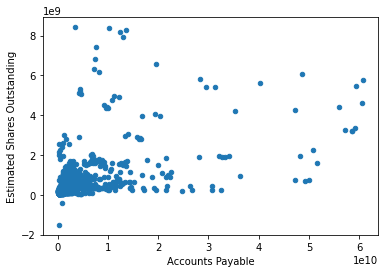

In [233]:
df_fund.plot.scatter(x = 'Accounts Payable',y = 'Estimated Shares Outstanding')

#### 2. Box plot for shares outstanding

#### the boxplot of estimated shares outstanding shows the shares outstanding for most companies are small with a median close to 0. From the boxplot, we can see lots of outliers have a much higher number of shares outstanding than the others. Hence, we can conclude that the variance of shares outstanding is relatively large.

<AxesSubplot:>

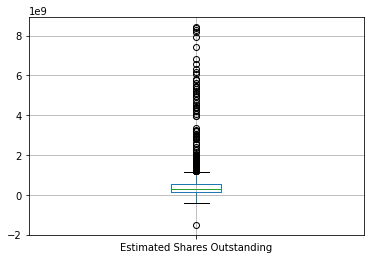

In [234]:
df_fund.boxplot(column = 'Estimated Shares Outstanding')

#### 3. Correlation matrix

#### The correlation matrix visualizes the strength and direction of the linear relationships between these variables. In the matrix, it shows that some variables, like Total Assets, Total Liabilities, and Total Equity, are highly positively correlated. Some variables have near-zero correlations, suggesting no linear relationship.

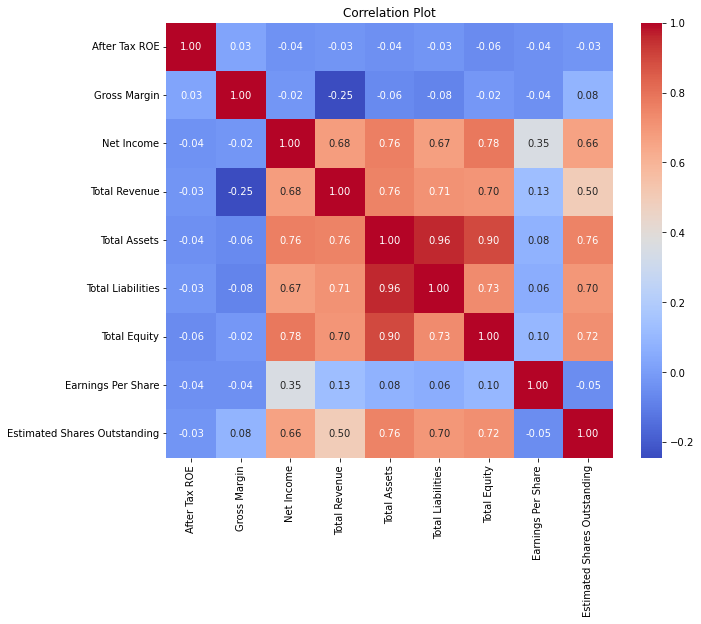

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for correlation analysis
selected_columns = [
    "After Tax ROE",
    "Gross Margin",
    "Net Income",
    "Total Revenue",
    "Total Assets",
    "Total Liabilities",
    "Total Equity",
    "Earnings Per Share",
    "Estimated Shares Outstanding",
]

subset_data = df_fund[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Plot")
plt.show()

#### 4. Box plot for Gross Margin

#### indicates that the majority of the companies have a gross margin between approximately 20% and 60%, with the median around 40%. There are no outliers in gross margin. And the distribution of gross margins is relatively symmetric.

<AxesSubplot:>

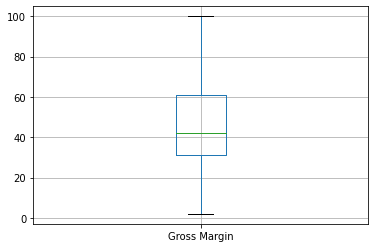

In [236]:
df_fund.boxplot(column = 'Gross Margin')

#### 5. KDE plot for total revenue

#### The density of Total Revenue is highly concentrated near a lower range of values, which suggests that most of the companies in this dataset have a relatively small Total Revenue.The tail of the plot extends towards the higher revenue values, suggesting that there are some outliers or companies with exceptionally high revenue.

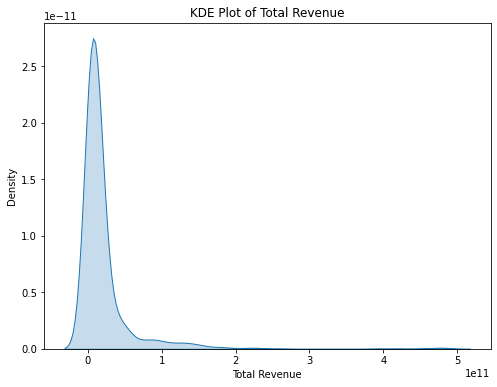

In [237]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df_fund[df_fund['For Year'] >= 2000]['Total Revenue'], fill=True)
plt.xlabel('Total Revenue')
plt.title('KDE Plot of Total Revenue')
plt.show()
#Overall distribution of the Total Revenue 

#### 6. boxplot for total revenue

#### According to the box plot of total revenue for different years, the range of it are similar and relatively small. All years contains outliers which have extremly high total revenue.

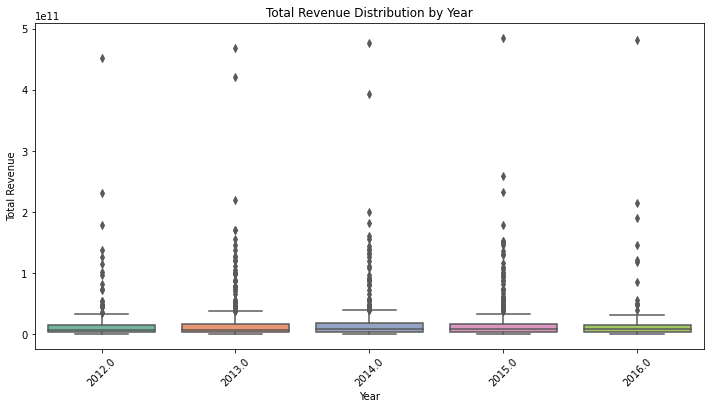

In [238]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='For Year', y='Total Revenue', data=df_fund[df_fund['For Year'] >= 2000], palette='Set2')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Distribution by Year')
plt.xticks(rotation=45)
plt.show()

In [239]:
df_fund['For Year'].unique()
df_fund['For Year'] = df_fund['For Year'].astype(int)
df_fund['For Year'] = df_fund['For Year'].astype(str)
df_pivot_asset = pd.pivot_table(df_fund[df_fund['For Year'].isin(['2012','2013','2014','2015','2016'])], values = 'Fixed Assets',index = 'For Year',aggfunc = np.mean)
df_pivot_asset

,Fixed Assets
For Year,
2012,1.137699e+10
2013,9.433644e+09
2014,9.864436e+09
2015,9.858124e+09
2016,5.062011e+09


### Question 2

In [240]:
df_fund.drop(columns = ['Unnamed: 0','Ticker Symbol','Period Ending'], inplace = True)

In [241]:
df_fund['For Year'] = df_fund['For Year'].astype(int)

In [242]:
X = df_fund.drop(columns = ['Estimated Shares Outstanding'])
y = df_fund['Estimated Shares Outstanding']

In [243]:
X.head()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012,-5.60
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013,-11.25
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,4.322500e+10,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014,4.02
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,4.841500e+10,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015,11.39
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,4.613814e+09,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012,5.29


In [244]:
import statsmodels.api as smf
X = smf.add_constant(X)
regr_model = smf.OLS(y,X).fit()
regr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.854
Model:                                      OLS   Adj. R-squared:                  0.846
Method:                           Least Squares   F-statistic:                     98.40
Date:                          Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                                  11:12:29   Log-Likelihood:                -27507.
No. Observations:                          1299   AIC:                         5.516e+04
Df Residuals:                              1225   BIC:                         5.554e+04
Df Model:                                    73                                         
Covariance Type:                      nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                7.312e+08      1e+09      0.729      0.466   -1.24e+09     2.7e+09
Accounts Payable                                     -183.9454    238.959     -0.770      0.442    -652.760     284.869
Accounts Receivable                                    -0.0722      0.057     -1.274      0.203      -0.183       0.039
Add'l income/expense items                              0.0361      0.057      0.635      0.525      -0.075       0.148
After Tax ROE                                       -6.663e+05      5e+05     -1.332      0.183   -1.65e+06    3.15e+05
Capital Expenditures                                    0.9122      2.396      0.381      0.704      -3.789       5.614
Capital Surplus                                         0.0149      0.009      1.631      0.103      -0.003       0.033
Cash Ratio                                           6.866e+05   3.83e+05      1.793      0.073   -6.45e+04    1.44e+06
Cash and Cash Equivalents                              -1.2388      0.617     -2.008      0.045      -2.449      -0.029
Changes in Inventories                                 -0.0876      0.060     -1.456      0.146      -0.206       0.030
Common Stocks                                          -0.0014      0.010     -0.143      0.886      -0.020       0.018
Cost of Revenue                                      3854.1844   5281.331      0.730      0.466   -6507.271    1.42e+04
Current Ratio                                       -2.044e+05   2.94e+05     -0.695      0.487   -7.82e+05    3.73e+05
Deferred Asset Charges                                 -0.0585      0.989     -0.059      0.953      -1.999       1.882
Deferred Liability Charges                              0.0094      0.099      0.095      0.925      -0.185       0.204
Depreciation                                           -0.0843      0.057     -1.488      0.137      -0.196       0.027
Earnings Before Interest and Tax                       22.5389     39.533      0.570      0.569     -55.022     100.100
Earnings Before Tax                                   -22.8602     39.533     -0.578      0.563    -100.420      54.699
Effect of Exchange Rate                                -0.0233      0.166     -0.141      0.888      -0.348       0.302
Equity Earnings/Loss Unconsolidated Subsidiary          0.1119      0.082      1.371      0.171      -0.048       0.272
Fixed Assets                                           -0.0572      0.989     -0.058      0.954      -1.998       1.883
Goodwill                                               -0.0642      0.989     -0.065      0.9

#### The Estimated Shares Outstanding is the dependent variable in our regression and the other 74 variables are the independent variables. From the summary of the regression, we have a high R-squared value (0.854). That means our independent variables explained a large proportion of the variation in the estimated shares outstanding. According to the F statistic in our model, we reject the null hypothesis that all regression coefficients are equal to zero and conclude that some independent variables are significant such as cash and cash equivalent, income tax, etc. In summary, our linear regression model can explain 85% of the variance in shares outstanding and it contains some insignificant variables.

### Question 3

#### Multicollinearity in linear regression occurs when two or more than two independent variables in the model are highly correlated with each other. This can make it quite challenging to interpret the coefficients of the regression model. When multicollinearity is present, it becomes difficult to determine the individual impact of each independent variable on the dependent variable as the effects get tangled up.


### Question 4

In [245]:
p_values = regr_model.pvalues

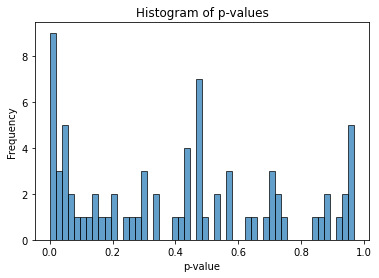

0.322899630038504

In [246]:
import matplotlib.pyplot as plt
from scipy.stats import skew
plt.hist(p_values, bins=50, edgecolor='black', alpha=0.7) # set the histrogram
# set value, x, y labels
plt.title("Histogram of p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.show() # this will print the histrogram
skew(p_values)

#### We can see from the histogram that it is slightly skewed to the right. And the skewness of the p-value is 0.32. It suggests that p-values are slightly more concentrated in the lower value. If all the p values are distributed uniformly then it means we may not have statistically significant predators.  The slightly right-skewed distribution of p-values in our linear regression indicates that we have small numbers of predictors that are statistically significant which can provide useful information to explain the estimated shares outstanding. 

### Question 5

In [247]:
def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)
  
  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N
  
  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  print(max_index)
  alpha = sorted_pvals[max_index]
  print(f"Alpha: {alpha}")
  reject_hyp = (pvals <= alpha)
  true_discoveries = sum(reject_hyp)

  # Optional plot
  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()
  
  return alpha, true_discoveries

In [248]:
p_values

const                         4.658595e-01
Accounts Payable              4.415806e-01
Accounts Receivable           2.029366e-01
Add'l income/expense items    5.253300e-01
After Tax ROE                 1.831375e-01
                                  ...     
Total Liabilities & Equity    4.657535e-01
Total Revenue                 4.656670e-01
Treasury Stock                4.199307e-01
For Year                      6.311003e-01
Earnings Per Share            7.831146e-27
Length: 76, dtype: float64

6
Alpha: 0.0016866311678487428


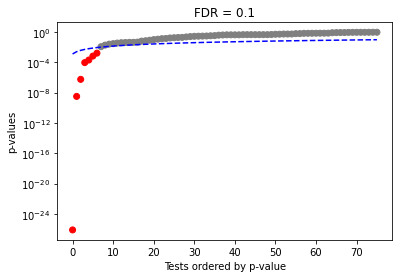

(0.0016866311678487428, 7)

In [249]:
alpha_threshold = fdr(p_values, 0.1, plotit=True)
alpha_threshold

#### When q=0.1, there are 7 “true” discoveries. This means there are 7 cases where the null hypothesis can be rejected and is considered significant while controlling the FDR at 0.1

### Question 6

5
Alpha: 0.0006898272109204104


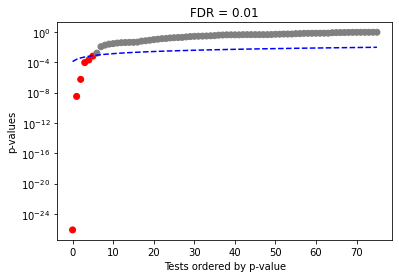

(0.0006898272109204104, 6)

In [250]:
alpha_threshold = fdr(p_values, 0.01, plotit=True)
alpha_threshold

#### When q=0.01, there are 6 “true” discoveries. This means there are 6 cases where the null hypothesis can be rejected and is considered significant while controlling the FDR at 0.01

6
Alpha: 0.0016866311678487428


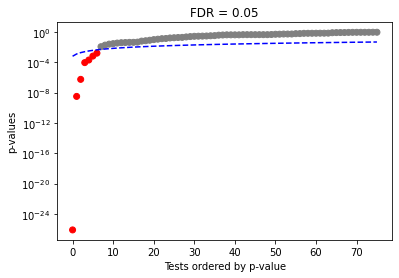

(0.0016866311678487428, 7)

In [251]:
alpha_threshold = fdr(p_values, 0.05, plotit=True)
alpha_threshold

#### When q=0.05, there are 7 “true” discoveries. This means there are 7 cases where the null hypothesis can be rejected and is considered significant while controlling the FDR at 0.05

6
Alpha: 0.0016866311678487428


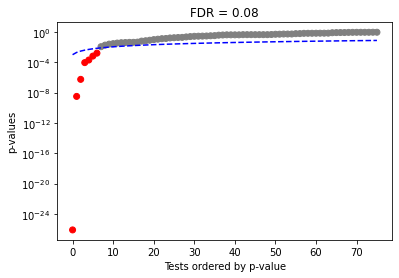

(0.0016866311678487428, 7)

In [252]:
alpha_threshold = fdr(p_values, 0.08, plotit=True)
alpha_threshold

#### When q=0.08, there are 7 “true” discoveries. This means there are 7 cases where the null hypothesis can be rejected and is considered significant while controlling the FDR at 0.08

9
Alpha: 0.026230279452928846


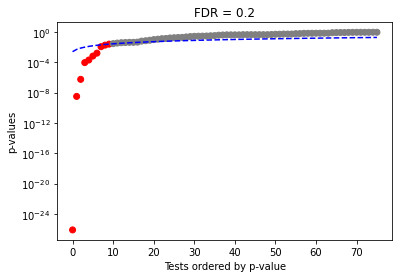

(0.026230279452928846, 10)

In [253]:
alpha_threshold = fdr(p_values, 0.2, plotit=True)
alpha_threshold

#### When q=0.2, there are 10 “true” discoveries. This means there are 10 cases where the null hypothesis can be rejected and is considered significant while controlling the FDR at 0.2

18
Alpha: 0.07315083157463122


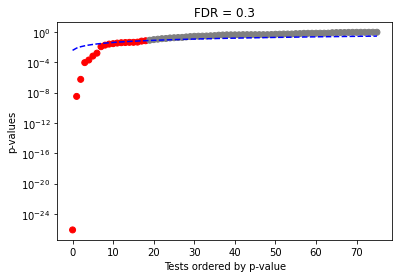

(0.07315083157463122, 19)

In [254]:
alpha_threshold = fdr(p_values, 0.3, plotit=True)
alpha_threshold

#### When q=0.3, there are 19 “true” discoveries. This means there are 19 cases where the null hypothesis can be rejected and is considered significant while controlling the FDR at 0.3

20
Alpha: 0.10319312646318653


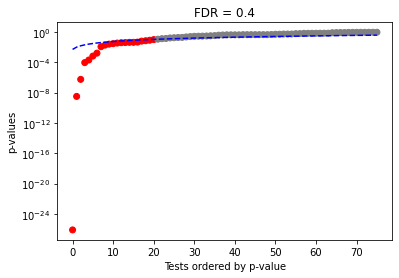

(0.10319312646318653, 21)

In [255]:
alpha_threshold = fdr(p_values, 0.4, plotit=True)
alpha_threshold

#### When q=0.1, there are 21 “true” discoveries. This means there are 21 cases where the null hypothesis can be rejected and is considered significant while controlling the FDR at 0.4

#### According to what we got, the stricter FDR control (the lower the q value) led to fewer true discoveries but greater confidence in significance. The larger the q-value allows more discoveries but decreases the confidence in significance. We can learn from these plots that a few variables are robustly regardless of different FDR levels. These robust variables have strong evidence that they are statistically significant, having a relationship with independent variables. Some variables only appear to be true discoveries under less strict FDR control which is less reliable and we have less evidence on the relationship between them and independent variables.

### Question 7

#### 7(a)

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

first_25_columns = df_fund.iloc[:,:25]
poly = PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False)
X_poly = poly.fit_transform(first_25_columns )
y = df_fund.iloc[:,-1]
model2 = LinearRegression().fit(X_poly, y)
coefficients = model2.coef_

In [257]:
#create a dataset
feature_names = poly.get_feature_names_out(input_features=df_fund.columns[:25])
feature_coefficients = dict(zip(feature_names, coefficients))
coefficients_df = pd.DataFrame(list(feature_coefficients.items()), columns=['Feature', 'Coefficient'])
coefficients_df

,Feature,Coefficient
0,Accounts Payable,-5.092475e-02
1,Accounts Receivable,-8.160806e-02
2,Add'l income/expense items,-1.566948e-01
3,After Tax ROE,-6.726152e-03
4,Capital Expenditures,-9.847339e-03
...,...,...
345,Gross Profit Income Tax,2.235942e-11
346,Gross Profit Intangible Assets,2.598879e-12
347,Income Tax^2,2.996298e-11
348,Income Tax Intangible Assets,-4.909601e-11


In [258]:
r_squared = model2.score(X_poly, y)
r_squared

0.9444622652459005

#### The interaction terms are concatenated with original predictors to form an enhanced feature set for regression, allowing the model to capture both the individual and combined effects of predictors on the dependent variable.

#### 7(b)

#### Interaction terms are important in predicting 'Estimated Shares Outstanding' because financial metrics often influence each other in non-independent ways. For instance, 'Capital Surplus' might have a different effect on 'Estimated Shares Outstanding' depending on the level of 'Earnings Before Interest and Tax'. So, by including interaction terms, the model includes these interaction terms to better understand how different financial measures work together, which can lead to more precise predictions.

### Question 8

#### 8(C)

In [259]:
import statsmodels.api as sm

#add constant term
X_poly_const = sm.add_constant(X_poly)

#fit OLS
model_interaction = sm.OLS(y, X_poly_const).fit()
model_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.944
Model:                                      OLS   Adj. R-squared:                  0.926
Method:                           Least Squares   F-statistic:                     52.59
Date:                          Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                                  11:12:37   Log-Likelihood:                -26886.
No. Observations:                          1299   AIC:                         5.440e+04
Df Residuals:                               983   BIC:                         5.604e+04
Df Model:                                   315                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.514      0.130   -9.54e-05       0.001
x1            -0.0742      0.046     -1.620      0.106      -0.164       0.016
x2            -0.5132      0.285     -1.798      0.072      -1.073       0.047
x3             0.0746      0.278      0.268      0.788      -0.471       0.620
x4             0.0007      0.001      0.820      0.413      -0.001       0.002
x5             0.0202      0.097      0.209      0.835      -0.170       0.210
x6             0.0557      0.021      2.659      0.008       0.015       0.097
x7             0.0003      0.000      0.888      0.375      -0.000       0.001
x8            -0.0249      0.059     -0.425      0.671      -0.140       0.090
x9            -0.1640      0.489     -0.335      0.737      -1.123       0.795
x10           -0.0121      0.049     -0.245      0.807      -0.109       0.085
x11           -0.0081      0.009     -0.889      0.374      -0.026       0.010
x12            0.0002      0.000      0.670      0.503      -0.000       0.001
x13            0.2453      0.121      2.022      0.043       0.007       0.483
x14           -0.0333      0.059     -0.560      0.576      -0.150       0.083
x15            0.0540      0.152      0.356      0.722      -0.243       0.351
x16            0.4022      0.295      1.365      0.172      -0.176       0.980
x17           -0.4533      0.287     -1.581      0.114      -1.016       0.109
x18           -0.0020      0.024     -0.081      0.935      -0.050       0.046
x19           -0.1996      0.125     -1.599      0.110      -0.445       0.045
x20            0.0081      0.020      0.414      0.679      -0.030       0.047
x21            0.0614      0.029      2.144      0.032       0.005       0.118
x22        -3.763e-05   4.66e-05     -0.808      0.419      -0.000    5.38e-05
x23            0.0276      0.089      0.310      0.757      -0.147       0.202
x24            0.2759      0.296      0.931      0.352      -0.305       0.857
x25           -0.1616      0.045     -3.617      0.000      -0.249      -0.074
x26          4.12e-12   1.92e-12      2.146      0.032    3.52e-13    7.89e-12
x27         5.737e-12   1.72e-11      0.334      0.738    -2.8e-11    3.94e-11
x28         4.626e-11   4.59e-11      1.009      0.313   -4.37e-11    1.36e-10
x29            0.0004      0.000      1.475      0.141      -0.000       0.001
x30         4.245e-11   1.69e-11      2.518      0.012    9.37e-12    7.55e-11
x31         9.524e-13   3.53e-12      0.270      0.788   -5.98e-12    7.89e-12
x32            0.0002      0.000      0.514      0.608      -0.001       0.001
x33        -3.848e-12   6.16e-12     -0.624      0.532   -1.59e-11    8.24e-12
x34         6.183e-13   2.05e-11      0.030      0

#### The R-squared value of the model with interaction is 0.944(94.4%), which indicates that the model fits the data well, and is higher as compared to the original model which has an R-squared value of 0.854(85.4%). Although the increase in R-squared value is a good indicator but it doesn't necessarily mean whether the interaction effects are significant or if it's due to the addition of new variables in the model. 
#### Note: Including additional variables in the model would increase the R-squared value.The adjusted R-squared value of the model with interaction is 0.926(92.6%), which indicates that the original variables along with their interaction terms explain 92.6% variation in the Estimated Shares Outstanding variable, while in the original model they just explain 84.% of the variation, which indicates including the interaction variables improved the model
#### AIC: The model with interaction has a lower AIC (5.440e+04) compared to the original model (5.516e+04), suggesting it may be the better model in balancing the complexity

#### 8(d)
#### As discussed above, the R-squared, and adjusted R-squared show that the interaction model was more efficient or fits the data well. Observing the variables, below are the variables which turned out to be significant in the model with interaction, which were not significant in the original model at a significance level of 0.05Accounts Payable, After Tax ROE, Cash Ratio, Current Ratio,Earnings Before Interest and Tax, Earnings Before Tax, Effect of Exchange Rate, Equity Earnings/Loss Unconsolidated Subsidiary, Goodwill, Intangible Assets

### Question 9

#### 9(a)

In [260]:
p_values_int = model_interaction.pvalues

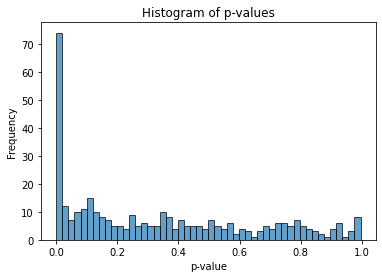

0.6111220638012704

In [261]:
import matplotlib.pyplot as plt
from scipy.stats import skew
plt.hist(p_values_int, bins=50, edgecolor='black', alpha=0.7) # set the histrogram
# set value, x, y labels
plt.title("Histogram of p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.show() # this will print the histrogram
skew(p_values_int)

#### The skewness value of 0.75 indicates a moderate right skew, meaning there are more p-values closer to 0. Compared with the original model that skewness value is 0.32, the model with interaction indicate that more variables are statistically significant. We can see from the histogram as well. Compared with the histogram for original model, this graph having more p-values concentrated near 0, which means they are statistically significant.

#### 9(b)

73
Alpha: 0.01917129530876515


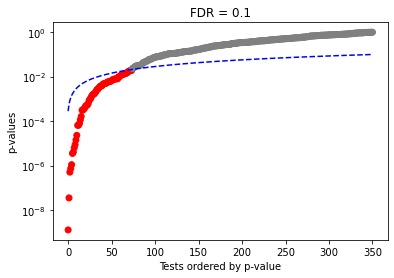

(0.01917129530876515, 74)

In [262]:
fdr(p_values_int, 0.1, plotit=True)

#### By applying the Benjamini-Hochberg procedure with a q-value of 0.1,we see that there are 74 significant predictors, including both main effects and interaction terms. This is understood from the point where the red line (observed p-values) crosses the blue dashed line (threshold for significance).

#### 9(c)

#### Compared with the original model, the model with interaction terms has a higher skewness towards a lower value in the histogram of p-value. In addition, the number of statistically significant predictors in the model with interaction increases. The original model identifies 7 significant predictors under FDR is 0.1 and the model with interaction identifies 74 significant predictors at the same FDR level. This suggests that a model with interaction terms can explain more than the original model. However, interaction terms also increase the complexity of the model. Hence we may need a stricter FDR level to maintain the reliability of the model with interaction terms.
